In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing Dataset

In [61]:
dataset=pd.read_csv('Credit_Card_Applications.csv')

In [62]:
dataset.head()


,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [63]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [64]:
#x containing all the variables except class column
X=dataset.iloc[:,:-1].values
#y cattaining only the class column
y=dataset.iloc[:,-1].values

Feature Scaling

In [65]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
X=sc.fit_transform(X)

Training the SOM

In [66]:
from minisom import MiniSom
som=MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X,num_iteration=100)

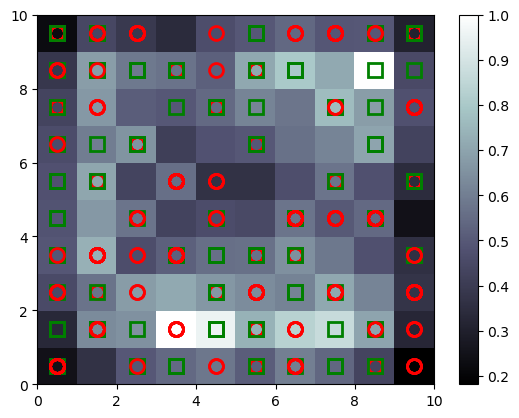

In [67]:
from pylab import bone,pcolor,colorbar,plot,show
bone()
pcolor(som.distance_map().T)
colorbar()
markers=['o','s']
colors=['r','g']
for i, x in enumerate(X):
    w= som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor='None',
         markersize=10,
         markeredgewidth=2)
show()
    

In [68]:
mappings=som.win_map(X)
frauds= np.concatenate((mappings[(4,2)], mappings[(9,9)]),axis=0)
frauds=sc.inverse_transform(frauds)

# Part-2 Going from unsupervised to supervised Deep Learning

creating the matrix of features

In [69]:
#taking all values except customer id
customers=dataset.iloc[:, 1:].values

In [70]:
is_fraud=np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i]=1

Feature scaling

In [71]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
customers=sc.fit_transform(customers)


In [72]:
import tensorflow as tf

Initializing the ANN

In [73]:
classifier=tf.keras.models.Sequential()

Adding the input layer and first hidden layer

In [74]:
classifier.add(tf.keras.layers.Dense(units=2,activation='relu',input_dim=15))

Adding the output layer

In [75]:
classifier.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

compiling ANN with optimizer and loss function

In [76]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Training the ANN on the Training set

In [77]:
classifier.fit(customers,is_fraud,batch_size=1,epochs=2)

Epoch 1/2
690/690 [==============================] - 1s 719us/step - loss: 0.3413 - accuracy: 0.9638
Epoch 2/2
690/690 [==============================] - 1s 724us/step - loss: 0.1884 - accuracy: 0.9638


# part-3 Making the Probability of frauds

In [78]:
y_pred = classifier.predict(customers)


22/22 [==============================] - 0s 917us/step


In [79]:
y_pred=np.concatenate((dataset.iloc[:, 0:1].values,y_pred),axis=1)

In [80]:
y_pred=y_pred[y_pred[:, 1].argsort()]

In [86]:
df=pd.DataFrame(y_pred,columns=['Customer_id','Probabbility'])

In [92]:
df.head()

,Customer_id,Probabbility
0,15599152.0,0.002152
1,15725028.0,0.002792
2,15600975.0,0.003023
3,15731989.0,0.003470
4,15735221.0,0.004121


In [93]:
df.tail()

,Customer_id,Probabbility
685,15575605.0,0.359468
686,15666096.0,0.359468
687,15699238.0,0.359468
688,15716347.0,0.359468
689,15790113.0,0.359468
